# PLANTILLA MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Nombres de los ficheros de datos.

In [3]:
nombre_df='df_tablon.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle( '../../02_Datos/03_Trabajo/' + nombre_df)
df

,id,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
0,660737,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.67,0.44,0
1,660727,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.04,0.67,0.12,0.56,1.00,1
2,660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.13,0.06,0.44,0.67,0
3,660681,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.63,0.06,0.67,0.78,1
4,660680,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.89,0.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,579697,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.16,0.45,0.25,0.67,1.00,1
4802,579642,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.78,0.12,0.56,1.00,0
4803,579622,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.26,0.62,0.16,0.56,0.56,1
4804,579615,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.10,0.09,0.16,0.56,1.00,1


In [5]:
df.set_index('id',inplace=True)

In [6]:
df.columns.to_list()

['origen_API',
 'origen_Landing Page Submission',
 'origen_Lead Add Form',
 'origen_OTROS',
 'fuente_Chat',
 'fuente_Direct Traffic',
 'fuente_Google',
 'fuente_OTROS',
 'fuente_Organic Search',
 'fuente_Reference',
 'ult_actividad_Chat Conversation',
 'ult_actividad_Converted to Lead',
 'ult_actividad_Email Link Clicked',
 'ult_actividad_Email Opened',
 'ult_actividad_OTROS',
 'ult_actividad_Page Visited on Website',
 'ult_actividad_SMS Sent',
 'ambito_Banking, Investment And Insurance',
 'ambito_Business Administration',
 'ambito_Finance Management',
 'ambito_Healthcare Management',
 'ambito_Human Resource Management',
 'ambito_IT Projects Management',
 'ambito_International Business',
 'ambito_Marketing Management',
 'ambito_Media and Advertising',
 'ambito_OTROS',
 'ambito_Operations Management',
 'ambito_Select',
 'ambito_Supply Chain Management',
 'ambito_Travel and Tourism',
 'ocupacion_OTROS',
 'ocupacion_Student',
 'ocupacion_Unemployed',
 'ocupacion_Working Professional',
 'd

In [7]:
df.drop(columns=['ambito_Banking, Investment And Insurance',
 'ambito_Business Administration',
 'ambito_Finance Management',
 'ambito_Healthcare Management',
 'ambito_Human Resource Management',
 'ambito_IT Projects Management',
 'ambito_International Business',
 'ambito_Marketing Management',
 'ambito_Media and Advertising',
 'ambito_OTROS',
 'ambito_Operations Management',
 'ambito_Select',
 'ambito_Supply Chain Management',
 'ambito_Travel and Tourism',
 'descarga_lm_No',
 'descarga_lm_Yes','visitas_total_mms','paginas_vistas_visita_mms','score_actividad_mms',
 'score_perfil_mms','fuente_Chat',
 'fuente_Direct Traffic',
 'fuente_Google',
 'fuente_OTROS',
 'fuente_Organic Search',
 'fuente_Reference',], inplace=True)

## MODELIZAR

### Crear el espacio de soluciones

In [8]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [9]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [10]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [11]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,5249.81,0.29,1402.29,1.48
4,4604.67,0.31,1289.88,1.47
5,4189.97,0.35,1181.73,1.56
6,3615.45,0.39,1247.93,1.43


#### Analizar los gráficos

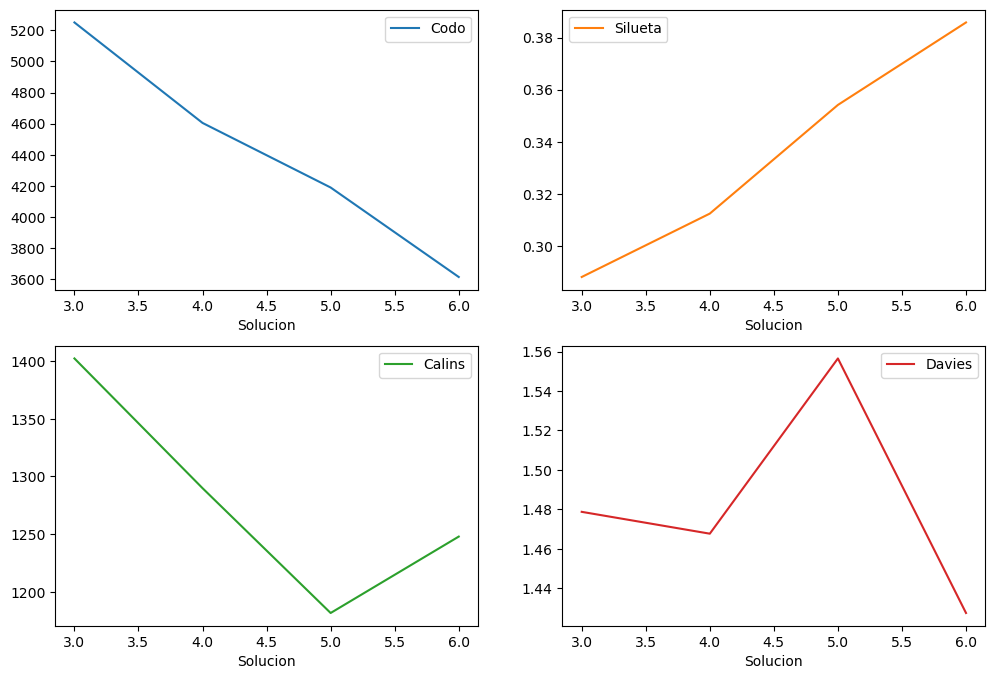

In [12]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False)
plt.show();

### Segmentación final con la mejor solucion

In [13]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [14]:
df['segmento'] = cluster.predict(df)

### Comparar los perfiles

## PERFILAR LOS SEGMENTOS

In [15]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
origen_API,0.000000,0.798301,0.000000,1.000000,0.217593,0.000000
origen_Landing Page Submission,0.949298,0.000000,0.967791,0.000000,0.569444,1.000000
origen_Lead Add Form,0.041342,0.188960,0.013804,0.000000,0.208333,0.000000
origen_OTROS,0.009360,0.012739,0.018405,0.000000,0.004630,0.000000
ult_actividad_Chat Conversation,0.000000,0.000000,0.078221,0.188392,0.011574,0.000000
ult_actividad_Converted to Lead,0.000000,0.000000,0.266871,0.111323,0.023148,0.000000
ult_actividad_Email Link Clicked,0.000000,0.025478,0.110429,0.046622,0.032407,0.000000
ult_actividad_Email Opened,1.000000,0.000000,0.000000,0.531874,0.365741,0.000000
ult_actividad_OTROS,0.000000,0.125265,0.174847,0.025690,0.085648,0.000000
ult_actividad_Page Visited on Website,0.000000,0.006369,0.369632,0.096099,0.053241,0.000000
